In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


In [2]:
iris = datasets.load_iris()

X = iris["data"][:,(2,3)] # petal lenght, petal width
y = (iris["target"]==2).astype(float)

In [3]:
# Primero tenemos que estandarizar nuestro modelo
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Segundo, ejecutamos el entrenamiento
svm_cl = LinearSVC()
svm_cl.fit(X,y)
svm_cl.score(X,y)

0.96

In [4]:
print(classification_report(y, svm_cl.predict(X)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       100
         1.0       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.96      0.96       150



In [5]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc",LinearSVC())
])

In [6]:
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('linear_svc', LinearSVC())])

In [7]:
svm_clf.score(X, y)

0.96

In [8]:
print(classification_report(y, svm_clf.predict(X)))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       100
         1.0       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.96      0.96      0.96       150



In [9]:
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=0)

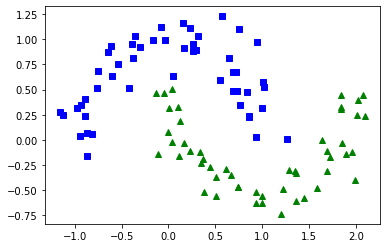

In [10]:
plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")

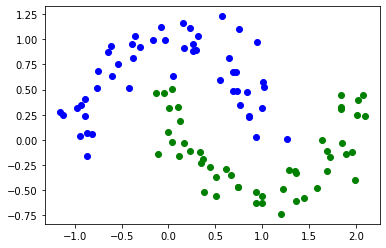

In [11]:
plt.scatter(X[:,0][y==0],X[:,1][y==0],c="b")
plt.scatter(X[:,0][y==1],X[:,1][y==1],c="g")

In [12]:
poly_svm = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_cl", LinearSVC(C=10, loss="hinge",random_state=0))
])

In [13]:
poly_svm.fit(X,y)

C:\Users\manyv\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_cl', LinearSVC(C=10, loss='hinge', random_state=0))])

In [14]:
poly_svm.score(X,y)

1.0

In [15]:
print(classification_report(y, poly_svm.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



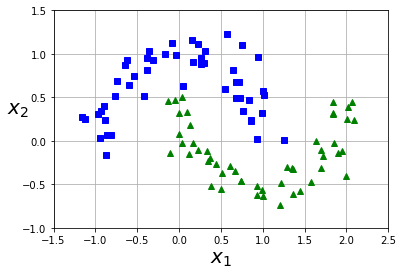

In [16]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

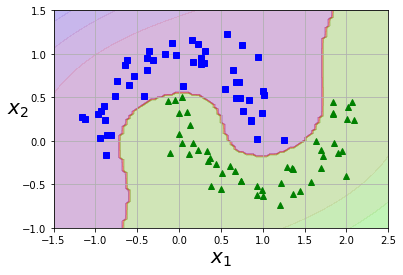

In [17]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_svm, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# SVC general

In [18]:
poly_kernel_svc = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svc.fit(X,y)
poly_kernel_svc.score(X,y)

0.98

In [19]:
poly100_kernel_svc = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])

poly100_kernel_svc.fit(X,y)
poly100_kernel_svc.score(X,y)

1.0

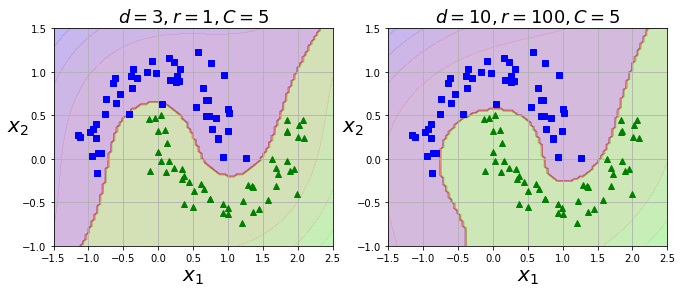

In [20]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svc, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svc, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

In [21]:
# Estudio de caso práctico
datos = pd.read_csv("./data/03Bank_Data.csv")
datos = datos.dropna(how="any")
datos = datos[datos["Balance"]>0]
datos = datos[datos["EstimatedSalary"]<max(datos["EstimatedSalary"])]

# Sorteo de ganadores...
index_NoExited = datos.query("Exited==0").sample(1537,random_state=0).index.to_list()
index_Exited   = datos.query("Exited==1").index.to_list()

datos = datos[datos.index.isin(index_NoExited + index_Exited)]

X = datos[["Age","NumOfProducts"]]
y = datos["Exited"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
kernel_svm_clf.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [72]:
kernel_svm_clf.score(X_test, y_test)

0.7074122236671001

In [73]:
print(classification_report(y_test, kernel_svm_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       399
           1       0.72      0.64      0.68       370

    accuracy                           0.71       769
   macro avg       0.71      0.70      0.70       769
weighted avg       0.71      0.71      0.71       769



In [75]:
svm_clf_scores = cross_val_score(kernel_svm_clf, X, y, cv=10, scoring="recall" )
print(svm_clf_scores)
print(svm_clf_scores.mean())
print(svm_clf_scores.std())

[0.5974026  0.62337662 0.75324675 0.5974026  0.71428571 0.70779221
 0.66233766 0.65359477 0.63398693 0.67973856]
0.6623164417282065
0.049156134482004676


# Grid search

In [78]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

In [82]:
cross_val_score(SVC(kernel="linear", C=10), iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [83]:
cross_val_score(SVC(kernel="rbf", C=10), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [84]:
cross_val_score(SVC(kernel="rbf", C=20), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [86]:
kernels = ["rbf","linear"]
C = [1,10,20]

avg_scores = {}

for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(SVC(kernel=kval, C=cval), iris.data, iris.target, cv=5)
        avg_scores[f"{kval}_{cval}"] = cv_scores.mean()


In [87]:
avg_scores

{'rbf_1': 0.9666666666666666,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9800000000000001,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

In [97]:
clf = GridSearchCV(
    SVC(gamma="auto"),
    {
        "C" : [1,10,20],
        "kernel": ["rbf","linear"]
    },
    cv=5,
    return_train_score=False,
    verbose=3
)

In [103]:
clf.fit(iris.data,iris.target)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ................................C=1, kernel=rbf; total time=   0.0s
[CV 2/5] END ................................C=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ................................C=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ................................C=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ................................C=1, kernel=rbf; total time=   0.0s
[CV 1/5] END .............................C=1, kernel=linear; total time=   0.0s
[CV 2/5] END .............................C=1, kernel=linear; total time=   0.0s
[CV 3/5] END .............................C=1, kernel=linear; total time=   0.0s
[CV 4/5] END .............................C=1, kernel=linear; total time=   0.0s
[CV 5/5] END .............................C=1, kernel=linear; total time=   0.0s
[CV 1/5] END ...............................C=10, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............................C=10,

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']},
             verbose=3)

In [104]:
df = pd.DataFrame(clf.cv_results_)
df[["param_C","param_kernel","mean_test_score"]]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [105]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

# Randomize Search

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [118]:
rs = RandomizedSearchCV(SVC(),{"C":[1,10,20], "kernel": ["rbf","linear"]}, cv=5, return_train_score=False, n_iter=2)

In [119]:
rs.fit(iris.data, iris.target)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=2,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']})

In [120]:
pd.DataFrame(rs.cv_results_)[["param_C","param_kernel","mean_test_score"]]

,param_C,param_kernel,mean_test_score
0,20,linear,0.966667
1,10,linear,0.973333
